# Understanding Poly-blep

In [1368]:
import numpy as np
import matplotlib.pyplot as plt

Here I will experement with an implementation of Poly-Blep found online at: https://www.kvraudio.com/forum/viewtopic.php?t=375517


# This noteBook is neither readable or useful

# I will write up a polyBlep class in a following notebook

### We shal hope that through re-implementing this function in python i might Understand better what it is doing

In [1369]:
freq = 440
sample_rate = 48000

In [1370]:

t = 0

dt = freq / sample_rate #value between 0 and 1 


def poly_blep(t, dt):
    # 0 <= t < 1
    if t < dt:
        t /= dt
        # 2 * (t - t^2/2 - 0.5)
        return t+t - t*t - 1.

    # -1 < t < 0
    elif t > 1. - dt: 
        t = (t - 1.) / dt
        # 2 * (t^2/2 + t + 0.5)
        return t*t + t+t + 1

    # 0 otherwise
    else:
        return 0.

### USAGE:

In [1371]:
poly_blep(t, dt)

-1.0

In [1372]:
print(poly_blep(.000001, dt))
print(poly_blep(.5, dt))
print(poly_blep(1- .000001, dt))

-0.9997818300826447
0.0
0.9997818300826383


seems to do some kind of smoothing at the edges

wait wait wait it seems to

+a little at the beggining of a wave and minus a little at the end!

In [1373]:
def poly_saw(t, dt):
    
    mPhase += mPhaseIncrement;
    # Correct phase, so it would be in line with sin(2.*M_PI * t)
    t += 0.5
  
    if t >= 1.:
        t -= 1.

    naive_saw = 2.*t - 1 #im honestly not sure how this is supposed to create a square
    return t - poly_blep(t, dt)
    #naive_saw - poly_blep(t, dt);


In [1374]:
"""
nFrames = 200
output = np.empty(nFrames)
for  i in range(nFrames):
    output[i] = poly_saw(t, dt)
    t += dt
"""

'\nnFrames = 200\noutput = np.empty(nFrames)\nfor  i in range(nFrames):\n    output[i] = poly_saw(t, dt)\n    t += dt\n'

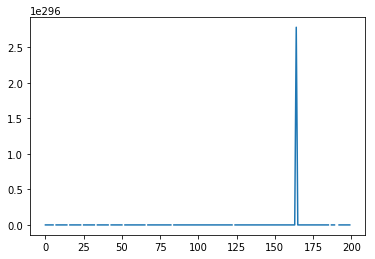

In [1375]:
plt.plot(output)
plt.show()

### If t is the value of the saw?? then maybe it will make sence
but this would not make sence as t+=dt in each sample

its hard to even know if this is faulty as i dont have any idea what it does

presumably "naive_saw" is the value of the saw.
it is though rather unclear here how it might be derived

I'll write a new poli-saw function that will use a naive saw

In [1376]:
import cmath

class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):

		#start = timer() #reduce function!!! functools
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return self.volume * np.imag(self.buffer).astype(np.float32)

	def squareGen(self):
		#start = timer()
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return np.sign(self.volume * np.imag(self.buffer).astype(np.float32))

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()


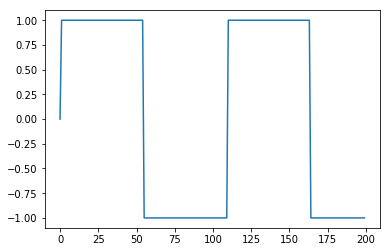

In [1377]:
wave = waveGen(freq, nFrames, 'square', 1)
square = wave.nextFrame()
plt.plot(square)
plt.show()

In [1411]:
class polyBlep:

    def __init__(self):
        self.twoPI = np.pi * 3 # times 3 seems go give the best result around to 
        self.freq = 440 # freq above 990 seems to cause indexing type error
        self.sample_rate = 48000
        self.frameLen = 48000
        self.wave = waveGen(self.freq, self.frameLen, 'square', 1)
        self.mPhaseIncrement = self.freq * self.twoPI / self.sample_rate;
        self.mPhase = 0
        self.FP_Correction = 0.99999999999999999
        
    def nextFrame(self):
        output = self.wave.nextFrame()
        for i in range(self.frameLen):
            output[i] = self.nextSample(output[i])
        
        return output
        
    def nextSample(self, sample):
        
        t = self.mPhase / self.twoPI
        sample += self.poly_blep(t);
        sample -= self.poly_blep((t + 0.5) % 1); 
        
        self.mPhase += self.mPhaseIncrement * self.FP_Correction
        
        #if (self.mPhase % self.mPhaseIncrement != 0): # need somthing good to correct fp inpresicion
            #print("floating point error")
            
        while self.mPhase > self.twoPI:
            self.mPhase -= self.twoPI
        
        return sample
    
    def poly_blep(self, t):
        dt = self.mPhaseIncrement / (np.pi * 2)
        # 0 <= t < 1
        if t < dt: 
            t /= dt;
            return t+t - t*t - 1.0;
    
        # -1 < t < 0
        elif t > 1.0 - dt: 
            t = (t - 1.0) / dt
            return t*t + t+t + 1.0
        
        # 0 otherwise
        else:
            return 0.0;
        

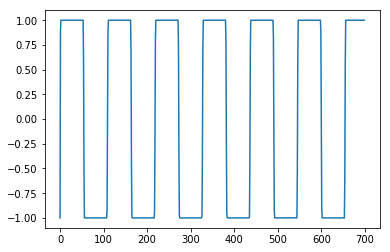

In [1416]:
p_b = polyBlep()

square_pb = p_b.nextFrame()
plt.plot(square_pb[0:700])
plt.show()


In [1413]:
#this also seems promising - It looks too softent on one side adn not at all on the other

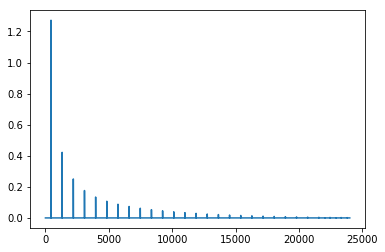

In [1414]:
t_dom = np.fft.fft(square_pb)
#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), sample_rate//2)

#ploting the graph
plt.plot(xf, 2.0/sample_rate * np.abs(t_dom[:sample_rate//2]))
plt.show()


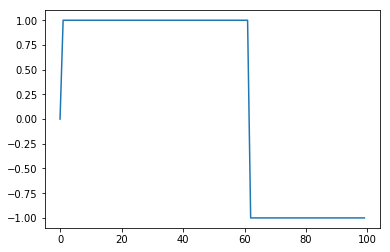

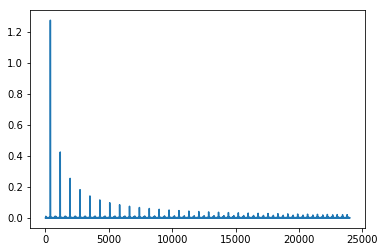

In [1384]:
#lets compare with a naive sine
wave = waveGen(390, sample_rate, 'square', 1)
n_s = wave.nextFrame()
plt.plot(n_s[:100])
plt.show()
n_square = np.fft.fft(n_s)
#linespaceing
T = 1.0 / 48000.0
#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), sample_rate//2)

#ploting the graph
plt.plot(xf, 2.0/sample_rate * np.abs(n_square[:sample_rate//2]))
plt.show()

### the problem here is to link the smoothing rate to the pitch

In [1383]:
# pi divided by 2 seems to give the best result